In [1]:
import numpy as np
import matplotlib.pyplot as plt

## PHYS 512 - Problem Set 5
### 1)

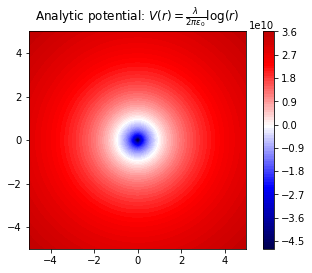

In [69]:
# ANALYTIC SOLUTION
charge_density = 1
e0 = 8.85e-12
xmin = -5; xmax = 5
ymin = -5; ymax = 5

xx = np.linspace(xmin, xmax, 100)
yy = np.linspace(ymin, ymax, 100)
x, y = np.meshgrid(xx, yy)
r = np.sqrt(x**2 + y**2)
V = 1/(2*np.pi*e0) * np.log(r)


# plt.contourf(x, y, V, 50)
f, ax = plt.subplots(1, 1)
ax.set_title(r'Analytic potential: $V(r) = \frac{\lambda}{2\pi\epsilon_0}\log(r)$', pad=10)
ax.set_aspect('equal', 'box')
c = ax.contourf(x, y, V, 100, vmax=-V.min(), cmap='seismic')
# plt.imshow(V, extent=[xmin, xmax, ymin, ymax], cmap='seismic', vmax=-V.min())
plt.colorbar(c)
plt.show()

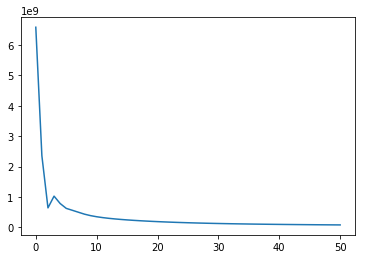

In [238]:
x = np.linspace(xmin, xmax, 101)
y = np.linspace(ymin, ymax, 101)
phi = 1e10*np.random.rand(len(x), len(y))
for i in range(len(x)):
    if i == 0 or i == len(x)-1:
        phi[i,:] = 0
        phi[:,i] = 0
    if i == (len(x)-1)/2:
        phi[i,i] = 10

# print(phi)
h = x[1] - x[0]
some_value = [phi[1,1]]

niter = 50
phistar = phi
for n in range(niter):
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            if i == (len(x)-1)/2 or j == (len(y)-1)/2:
                pass
            else:
                phistar[i,j] = (phi[i+1,j] + phi[i,j+1] + phi[i-1,j] + phi[i,j-1] + h**2*phi[i,j])/4
    phi = phistar
    some_value.append(phi[1,1])
    
plt.plot(some_value)
plt.show()

In [243]:
phi[49:52, 49:52]

array([[3.78377899e+09, 8.86886073e+09, 7.30589949e+09],
       [1.80252596e+08, 1.00000000e+01, 9.12726236e+09],
       [4.50711094e+09, 9.00714608e+09, 8.03100984e+09]])

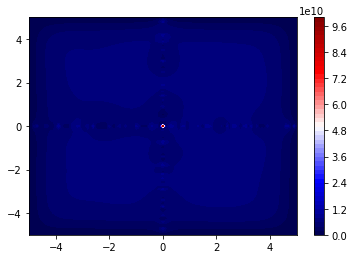

In [237]:
z = np.gradient(phi)[1]
plt.contourf(x, y, phi, 50, cmap='seismic')
plt.colorbar()
plt.show()

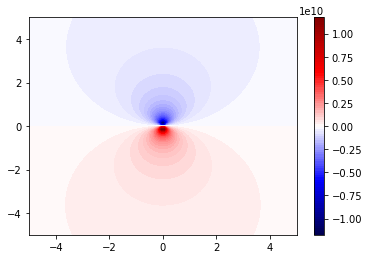

In [190]:
plt.contourf(x, y, -np.array(np.gradient(V)[0]), 100, cmap='seismic')
plt.colorbar()
plt.show()

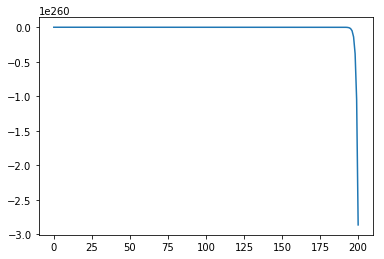

In [139]:
some_value = [phi[1,1]]

niter = 200

for n in range(niter):
    for i in range(1,len(x)-1):
        for j in range(1,len(y)-1):
            phistar[i,j] = (phi[i+1,j] + phi[i,j+1] + phi[i-1,j] + phi[i,j-1] + h**2*phi[i,j])/4
    phi = phistar
    some_value.append(phi[1,1])
    
plt.plot(some_value)
plt.show()

In [106]:
for i in range(1,len(x)-1):
    for j in range(1,len(y)-1):
        phistar[i,j] = (phi[i+1,j] + phi[i,j+1] + phi[i-1,j] + phi[i,j-1] + h**2*phi[i,j])/4
phistar

array([[      0.        ,       0.        ,       0.        ,
              0.        ,       0.        ],
       [      0.        ,  295560.25003116,  692818.81569028,
         809745.34211446,       0.        ],
       [      0.        ,  677691.06103249, 1590723.63801792,
        1862638.818965  ,       0.        ],
       [      0.        ,  780400.20638429, 1833809.36949715,
        2150336.03541839,       0.        ],
       [      0.        ,       0.        ,       0.        ,
              0.        ,       0.        ]])

In [81]:
# RELAXATION METHOD
phi_star = 0.25*(phi)

In [78]:
np.random.randn(100, 100).shape

(100, 100)

In [114]:
%matplotlib inline